In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from __future__ import print_function

In [ ]:
df1 = pd.read_csv('./data/train.csv')
dfs = pd.read_csv('./data/test.csv')
print(df1.columns)
print(dfs.columns)

In [ ]:
# df = pd.concat([df1, dfs])
# df=df.drop_duplicates(keep=False)
# df1=df
data=df1

data = data[['WiFi density','RSI class','Honk_duration','Timelevel','Intersection density','Class']]
data=data.drop_duplicates(subset=['WiFi density','RSI class','Honk_duration','Timelevel','Intersection density'],keep='first', inplace=False)
data=data.dropna()

In [ ]:

le = LabelEncoder().fit(data.Class) 
labels = le.transform(data.Class)

X = data.drop('Class',axis=1)
X = X.values
Y = labels
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,random_state=42, test_size=0.3)


In [ ]:
class_names=['Fast','Normal','Slow','Very Fast']
feature_names=['WiFi density','RSI class','Honk_duration','Timelevel','Intersection density']

In [5]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Model 1 - GradientBoosting Classifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, Y_train)
print("Accuracy=",accuracy_score(Y_validation, model_gb.predict(X_validation)))
print("F1-score=",f1_score(Y_validation, model_gb.predict(X_validation),average='weighted'))


model_gb = GradientBoostingClassifier()
model_gb.fit(X, Y)


# # Model 2 - RandomForest Classifier
# model_rf = RandomForestClassifier()
# model_rf.fit(X_train, Y_train)
# print("Accuracy=",accuracy_score(Y_validation, model_rf.predict(X_validation)))
# print("F1-score=",f1_score(Y_validation, model_rf.predict(X_validation),average='weighted'))

# model_rf = RandomForestClassifier()
# model_rf.fit(X, Y)


NameError: name 'X_train' is not defined

In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular


predict_fn_gb = lambda x: model_gb.predict_proba(x).astype(float)


# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,mode='classification',feature_selection= 'auto',
                                                   class_names=class_names,feature_names = feature_names, 
                                                   kernel_width=None,discretize_continuous=True)

# Pick the observation in the validation set for which explanation is required
observation_1 = 77

# Get the explanation for GradientBoosting Classifier
exp = explainer.explain_instance(X_validation[observation_1], predict_fn_gb, num_features=5,top_labels=1)
exp.show_in_notebook(show_all=False)

# exp.as_pyplot_figure(label=2)
# print(exp.score)
# exp.save_to_file('./data/',X_validation[observation_1], predict_fn_gb, num_features=5,top_labels=1)



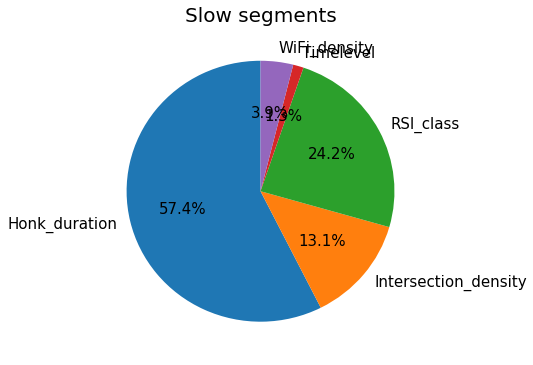

In [4]:
`

In [7]:
# print('Sample No: %d' % observation_1)
# print('Predicted class: %s'% class_names[model_gb.predict(X_validation[observation_1].reshape(1,-1)).reshape(1,-1)[0,0]])
# print('Actual class: %s \n' % class_names[Y_validation[observation_1]])
s2=class_names[model_gb.predict(X_validation[observation_1].reshape(1,-1)).reshape(1,-1)[0,0]]
s1=class_names[Y_validation[observation_1]]
# print ('Explanation for %s Speed Class \n' % class_names[model_gb.predict(X_validation[observation_1].reshape(1,-1)).reshape(1,-1)[0,0]])
s3= (','.join(map(str, exp.as_list(label=model_gb.predict(X_validation[observation_1].reshape(1,-1)).reshape(1,-1)[0,0]))))
s6=exp.score
s3=s3.replace('(','').replace("),",',').replace("',","':").replace(')','')
s3=s3.split(',')
s=[]
s.append(s1)
s.append(s2)
s.append(s6)
s4=[]
for w in s3:
    w=w.split(':')
    w[1]=float(w[1])
    s4.append(w)
#     print(w)
import operator 
s4 = sorted(s4, key=operator.itemgetter(1))
s4 = s4[::-1]
# print(s4) 

for w in s4:
    w[0]=w[0].replace('<=',',')
    w[0]=w[0].replace('>=',',')
    w[0]=w[0].replace('>',',')
    w[0]=w[0].replace('<',',')
    w[0]=w[0].replace("'",'')
    ab=w[0].split(",")
    ab.sort()
#     print(ab)
    w[0]=ab[1]
    w[1]=str(w[1])
    w=" : ".join(w)
    s.append(w)
columns = ['Actual','Predicted','score','Feat. rank1','Feat. rank2', 'Feat. rank3','Feat. rank4','Feat. rank5']
df1= pd.DataFrame( [s],columns=columns)
test_predictions =model_gb.predict_proba(X_validation[observation_1].reshape(1,-1))
df2 = pd.DataFrame(test_predictions, columns=['Prob. Fast', 'Prob. Normal', 'Prob. Slow', 'Prob. Very Fast'])
df1 = df2.join(df1) 
df=df1
df

NameError: name 'class_names' is not defined

In [ ]:
datas=dfs
data = datas[['WiFi density','RSI class','Honk_duration','Timelevel','Intersection density','Class']]
data=data.drop_duplicates(subset=['WiFi density','RSI class','Honk_duration','Timelevel','Intersection density'])
data=data.dropna()

le = LabelEncoder().fit(data.Class) 
labels = le.transform(data.Class)
classes = list(le.classes_)
X = data.drop('Class',axis=1)
array = X.values
number_of_features = len(array[0])
X = array[:,0:number_of_features]
Y = labels
# print(classes)

In [ ]:
for id in range(0,len(X)):
    exp = explainer.explain_instance(X[id], predict_fn_gb, num_features=5,top_labels=1)
#     print(exp.score)
#     exp = explainer.explain_instance(X_validation[id], predict_fn_gb, num_features=5,top_labels=1)
#     print('\nSample Test No:',id+1)
#     print('Predicted class: %s'% class_names[model_gb.predict(X_validation[id].reshape(1,-1)).reshape(1,-1)[0,0]])
#     print('Actual class: %s \n' % class_names[Y_validation[id]])
#     print ('Explanation for %s Speed Class \n' % class_names[model_gb.predict(X_validation[id].reshape(1,-1)).reshape(1,-1)[0,0]])
#     print ('\n'.join(map(str, exp.as_list(label=model_gb.predict(X_validation[id].reshape(1,-1)).reshape(1,-1)[0,0]))))
    s2=class_names[model_gb.predict(X[id].reshape(1,-1)).reshape(1,-1)[0,0]]
    s1=class_names[Y[id]]
    # print ('Explanation for %s Speed Class \n' % class_names[model_gb.predict(X_validation[observation_1].reshape(1,-1)).reshape(1,-1)[0,0]])
    s3= (','.join(map(str, exp.as_list(label=model_gb.predict(X[id].reshape(1,-1)).reshape(1,-1)[0,0]))))

    s3=s3.replace('(','').replace("),",',').replace("',","':").replace(')','')
    s3=s3.split(',')
    s6=exp.score
    s=[]
    s.append(s1)
    s.append(s2)
    s.append(s6)
    s4=[]
    for w in s3:
        w=w.split(':')
        w[1]=float(w[1])
        s4.append(w)
    #     print(w)
    import operator 
    s4 = sorted(s4, key=operator.itemgetter(1))
    s4 = s4[::-1]
    # print(s4) 

    for w in s4:
        w[0]=w[0].replace('<=',',')
        w[0]=w[0].replace('>=',',')
        w[0]=w[0].replace('>',',')
        w[0]=w[0].replace('<',',')
        w[0]=w[0].replace("'",'')
        ab=w[0].split(",")
        ab.sort()
        w[0]=ab[1]
        w[1]=str(w[1])
        w=" : ".join(w)
        s.append(w)
    columns = ['Actual','Predicted','Score','Feat. rank1','Feat. rank2', 'Feat. rank3','Feat. rank4','Feat. rank5']
    df1= pd.DataFrame( [s],columns=columns)
    test_predictions =model_gb.predict_proba(X[id].reshape(1,-1))
    df2 = pd.DataFrame(test_predictions, columns=['Prob. Fast', 'Prob. Normal', 'Prob. Slow', 'Prob. Very Fast'])
    df1 = df2.join(df1)
    df=pd.DataFrame(np.concatenate([df, df1]),columns=df.columns)


df.drop(df.index[[0]],inplace=True)
df = df.reset_index(drop=True)
df

In [ ]:
df=dfs.join(df)
df.to_csv('./data/3apr_lime.csv', index = False)

from sklearn.metrics import accuracy_score, log_loss,classification_report
# import confusion_plot as cp
# import matplotlib.pyplot as plt
target_names = ['Slow', 'Normal','Fast','VeryFast']

X=df['Actual'].values
Y=df['Predicted'].values
# print("Accuracy:",accuracy_score(X,Y))

In [ ]:
df1=df
cnt=0
#boundary condition +-1 or +-2 or +-3
val=3

for index, row in df1.iterrows():
    if row['Predicted']=='Normal'and row['Actual']=='Slow':
        if(abs(row['Mean_speed_kmph']-20)<=val):
            print(row['Mean_speed_kmph'],"20",abs(row['Mean_speed_kmph']-20))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
          
    if row['Predicted']=='Slow'and row['Actual']=='Normal':
        if(abs(row['Mean_speed_kmph']-20)<=val):
            print(row['Mean_speed_kmph'],"20",abs(row['Mean_speed_kmph']-20))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
      
    if row['Predicted']=='Normal'and row['Actual']=='Fast':
        if(abs(row['Mean_speed_kmph']-35)<=val):
            print(row['Mean_speed_kmph'],"35",abs(row['Mean_speed_kmph']-35))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
           
    if row['Predicted']=='Fast'and row['Actual']=='Normal':
        if(abs(row['Mean_speed_kmph']-35)<=val):
            print(row['Mean_speed_kmph'],"35",abs(row['Mean_speed_kmph']-35))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
            
    if row['Predicted']=='Very Fast'and row['Actual']=='Fast':
        if(abs(row['Mean_speed_kmph']-50)<=val):
            print(row['Mean_speed_kmph'],"50",abs(row['Mean_speed_kmph']-50))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
         
    if row['Predicted']=='Fast'and row['Actual']=='Very Fast':
        if(abs(row['Mean_speed_kmph']-50)<=val):
            print(row['Mean_speed_kmph'],"50",abs(row['Mean_speed_kmph']-50))
#             cnt+=row[row['Predicted']]+row[row['Actual']]
            df1.loc[index,'Predicted']=row['Actual']
#             df1.loc[index,'Result']='Yes'
    

df=df1

In [ ]:
from sklearn.metrics import accuracy_score, log_loss,classification_report
# import confusion_plot as cp
# import matplotlib.pyplot as plt
target_names = ['Slow', 'Normal','Fast','VeryFast']

X=df['Actual'].values
Y=df['Predicted'].values
# print("Accuracy:",accuracy_score(X,Y))

In [ ]:
# df=df1
# df=df[['Column',
#  'Prob. Fast',
#  'Prob. Normal',
#  'Prob. Slow',
#  'Prob. Very Fast',
#  'Actual',
#  'Predicted',
#  'Feat. rank1',
#  'Feat. rank2',
#  'Feat. rank3',
#  'Feat. rank4',
#  'Feat. rank5']]
# df=df.copy()
# df["Acc 1"] = ""
# df["Acc 2"] =" "
# for index, row in df.iterrows():
#     df.loc[index, 'Acc 1'] = row["Prob. "+row['Actual class']]
#     df.loc[index, 'Acc 2'] = row["Prob. "+row['Predicted class']]
# df.reset_index()
# print("Actual Prob.", df['Acc 1'].sum()/df['Acc 1'].count())
# print("Predicted Prob.", df['Acc 2'].sum()/df['Acc 1'].count())

In [ ]:
df.to_csv('./data/result_apr.csv', index = False)
df
